<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="600" height="200"/>
</p></center>

<h1><center><font size=8>COVID-19 Image Classification</center></font></h1>
<h1><center>Analitis, Iraklis - Project 8</center></h1>

# Introduction

## Context

Covid-19 is a fast-growing disease that affects human health severely. Patients diagnosed with this condition suffer from lung infections. The medical community has recently released vaccines that have a slower effect in increasing immunity. This virus has impacted various countries' human health and financial standards. Deep learning algorithms have recently used image classification to identify medical images. Convolutional Neural Networks (CNN) can be widely utilized to identify COVID-19 to assist radiologists in medical analysis by classifying patients who are healthy, have viral pneumonia, or are affected by COVID using X-ray pictures of the lungs.

## Objective

The aim of this project is to build a Convolutional Neural Network to differentiate an X-ray image of a normal person from an unhealthy one.


### Data Description

This dataset contains training set images of 3 classes which are converted into numpy
arrays.
The dataset comprises 3 classes:
* COVID-19: The patient who is affected due to COVID-19.
* Viral Pneumonia: This is a viral fever that has similar characteristics to COVID-19.
but is not covid.
* Normal: A healthy person.

The data file names are:
* CovidImages.npy
* CovidLabels.csv

Due to the large volume of data, the images were converted to the CovidImages.npy file and the labels are also put into CovidLabels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

#Data Summary

## **Importing the necessary libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project8/CovidImages.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/UTAustinAIMLProjects/Project8/CovidLabels.csv')

## Overview of the dataset


Let's print the shape of the images and labels 

In [4]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


There are 251 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

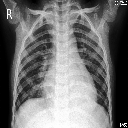

In [5]:
cv2_imshow(images[5])

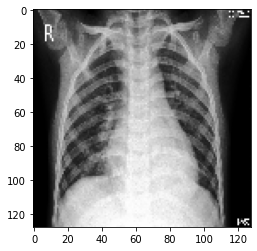

In [6]:
plt.imshow(images[5])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

# **Exploratory Data Analysis** 

In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

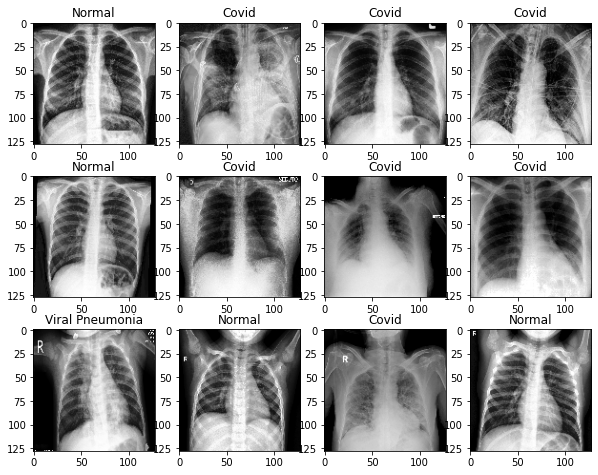

In [9]:
plot_images(images,labels)

<b> Checking for data imbalance

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

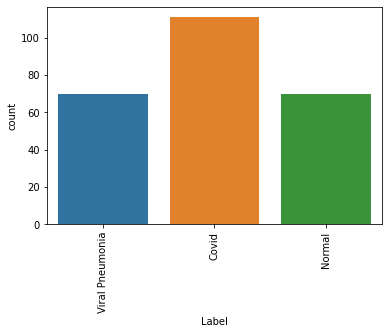

In [10]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

- As you can see from the above plot, the dataset is somewhat balanced. The Covid samples make up the majority of the set with 100+ images, while the Normal and Viral Pneumonia samples have approximately 70 images each. 

# Data Pre-Processing

## Gaussian Blur 

In [11]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

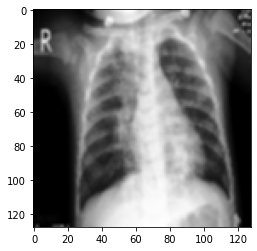

In [12]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be useful in minimizing the noise of the image data that we feed to the model.

## Splitting the dataset


In [13]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_gb),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [14]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(202, 128, 128, 3) (202, 1)
(23, 128, 128, 3) (23, 1)
(26, 128, 128, 3) (26, 1)


* Our training set is approximately 80% of our data while the test and validation sets are approximately 10% each.

# Making the data compatible

- Balance classes with weights
- Convert labels from names to one hot vectors
- Normalizing the values


In [15]:
#Balancing the data to make it more compatible with keras
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 1.1812865497076024, 1: 0.7565543071161048, 2: 1.2023809523809523}

* The features are now balanced on the y-axis of the training set.

## Encoding the target labels

In [16]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
* Normalize the 8-bit pixel data by dividing by 255, will yield values from 0.0-1.0

In [17]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


# **Model 1 - CNN**


In [18]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [19]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [20]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer  
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 32)                2

## Fitting the model on the train data

In [21]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=64,
            verbose=2,
            class_weight = class_weights
)

Epoch 1/30
4/4 - 11s - loss: 1.2167 - accuracy: 0.3812 - val_loss: 1.0600 - val_accuracy: 0.5217 - 11s/epoch - 3s/step
Epoch 2/30
4/4 - 0s - loss: 1.0227 - accuracy: 0.5594 - val_loss: 0.9173 - val_accuracy: 0.5652 - 277ms/epoch - 69ms/step
Epoch 3/30
4/4 - 0s - loss: 0.8221 - accuracy: 0.6238 - val_loss: 0.6097 - val_accuracy: 0.6957 - 266ms/epoch - 66ms/step
Epoch 4/30
4/4 - 0s - loss: 0.5741 - accuracy: 0.7624 - val_loss: 0.6230 - val_accuracy: 0.6522 - 267ms/epoch - 67ms/step
Epoch 5/30
4/4 - 0s - loss: 0.5630 - accuracy: 0.7574 - val_loss: 0.4165 - val_accuracy: 0.8261 - 271ms/epoch - 68ms/step
Epoch 6/30
4/4 - 0s - loss: 0.4426 - accuracy: 0.8020 - val_loss: 0.4167 - val_accuracy: 0.8696 - 266ms/epoch - 67ms/step
Epoch 7/30
4/4 - 0s - loss: 0.3992 - accuracy: 0.8317 - val_loss: 0.4838 - val_accuracy: 0.7826 - 269ms/epoch - 67ms/step
Epoch 8/30
4/4 - 0s - loss: 0.4187 - accuracy: 0.8267 - val_loss: 0.3316 - val_accuracy: 0.9130 - 270ms/epoch - 68ms/step
Epoch 9/30
4/4 - 0s - loss:

## Model 1 Evaluation

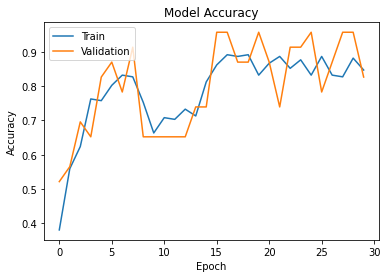

In [22]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

*   We can see from the above plot that training and validation accuracy on the data are both very good after sufficient iterations.
*   The model does not seem to overfit generally, in fact the validation accuracy is generally higher which is likely due to the dropout being applied to the model.






### **Evaluating the model on test data**

In [23]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 0s - loss: 0.2418 - accuracy: 0.9231 - 291ms/epoch - 291ms/step


### **Generating the predictions using test data**

In [24]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

1/1 [==============================] - 0s 88ms/step


In [25]:
y_pred

array([[1.88130616e-06, 1.34780188e-03, 9.98650372e-01],
       [9.99936938e-01, 6.31028815e-05, 7.65904851e-09],
       [9.99987960e-01, 1.20901004e-05, 3.12310391e-08],
       [9.88492787e-01, 1.09974341e-02, 5.09743870e-04],
       [4.24457975e-02, 2.87723392e-01, 6.69830799e-01],
       [9.99797881e-01, 2.02149880e-04, 5.83567648e-08],
       [9.84266579e-01, 1.52135678e-02, 5.19743306e-04],
       [2.29440078e-01, 5.15833259e-01, 2.54726648e-01],
       [2.58797407e-01, 4.45358843e-01, 2.95843750e-01],
       [9.99983907e-01, 1.60364161e-05, 7.02916059e-10],
       [2.65855851e-06, 1.76763663e-03, 9.98229682e-01],
       [9.99897599e-01, 1.02305792e-04, 9.47229779e-08],
       [2.34636635e-01, 5.15537083e-01, 2.49826327e-01],
       [1.78864011e-05, 4.76580579e-03, 9.95216370e-01],
       [1.88903825e-04, 1.58237685e-02, 9.83987331e-01],
       [1.26366643e-07, 3.59650352e-04, 9.99640226e-01],
       [1.00000000e+00, 2.85653119e-08, 8.17145966e-14],
       [1.00000000e+00, 3.68611

### **Plotting the Confusion Matrix**

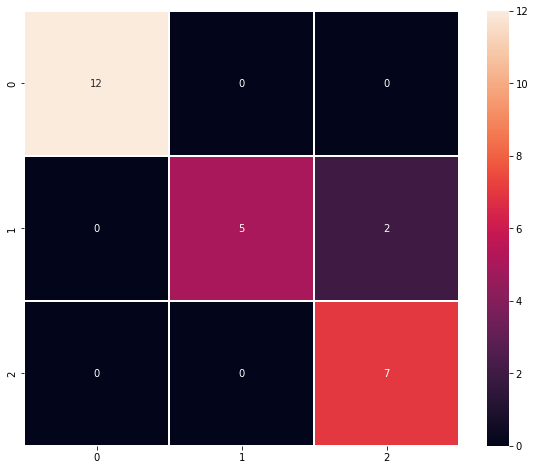

In [26]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that most of the classes are predicted correctly, although 3 of them were not. This is a good level of performance from our first model.

# Model 2 - CNN with Data Augmentation

In [27]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [28]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )

In [29]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer  
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(3, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                        

In [30]:
# Epochs
epochs = 25
# Batch size
batch_size = 128

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,
                    class_weight = class_weights)

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.6031 - accuracy: 0.3108 - val_loss: 1.0562 - val_accuracy: 0.3913
Epoch 2/25
1/1 [==============================] - 0s 355ms/step - loss: 7.1164 - accuracy: 0.4324 - val_loss: 1.0190 - val_accuracy: 0.5652
Epoch 3/25
1/1 [==============================] - 2s 2s/step - loss: 1.6344 - accuracy: 0.6953 - val_loss: 1.0022 - val_accuracy: 0.3478
Epoch 4/25
1/1 [==============================] - 0s 344ms/step - loss: 0.9736 - accuracy: 0.6757 - val_loss: 0.9947 - val_accuracy: 0.3478
Epoch 5/25
1/1 [==============================] - 0s 345ms/step - loss: 0.7739 - accuracy: 0.6351 - val_loss: 1.1353 - val_accuracy: 0.3043
Epoch 6/25
1/1 [==============================] - 0s 382ms/step - loss: 0.4516 - accuracy: 0.8784 - val_loss: 1.4361 - val_accuracy: 0.3043
Epoch 7/25
1/1 [==============================] - 0s 367ms/step - loss: 0.4591 - accuracy: 0.8108 - val_loss: 1.6114 - val_accuracy: 0.3043
Epoch 8/25
1/1 [==========

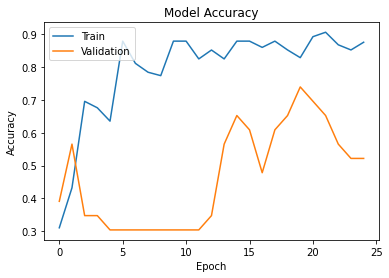

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 0s - loss: 1.7253 - accuracy: 0.5385 - 353ms/epoch - 353ms/step


We can observe that our test accuracy has actually decreased when compared to the previous model and it seems that we are now overfitting significantly.

In [33]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

1/1 [==============================] - 0s 68ms/step


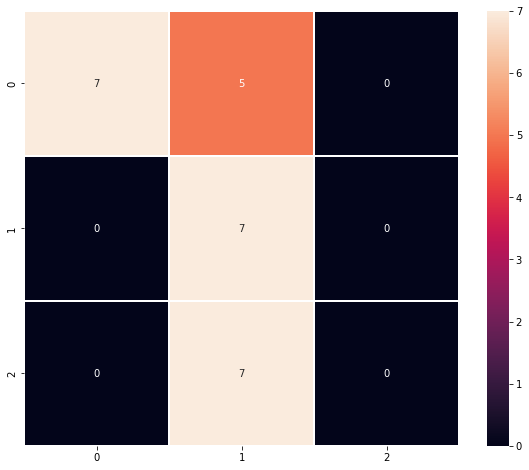

In [34]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

* We can see from the confusion matrix that our model is worse than the previous one. There are significantly more errors now, more than five times the previous model.

# Model 3 - Transfer Learning Model

In [35]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [36]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [37]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(3, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 15,241,219
Trainable params: 526,531
Non

In [38]:
# Epochs
epochs = 25
# Batch size
batch_size = 128

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1,
                    class_weight = class_weights)

Epoch 1/25
1/1 [==============================] - 5s 5s/step - loss: 1.7304 - accuracy: 0.2973 - val_loss: 2.2065 - val_accuracy: 0.2609
Epoch 2/25
1/1 [==============================] - 0s 421ms/step - loss: 1.7603 - accuracy: 0.4054 - val_loss: 1.4162 - val_accuracy: 0.2609
Epoch 3/25
1/1 [==============================] - 4s 4s/step - loss: 1.5536 - accuracy: 0.2188 - val_loss: 1.0293 - val_accuracy: 0.5217
Epoch 4/25
1/1 [==============================] - 0s 413ms/step - loss: 1.1263 - accuracy: 0.4189 - val_loss: 0.9640 - val_accuracy: 0.4348
Epoch 5/25
1/1 [==============================] - 0s 419ms/step - loss: 1.1019 - accuracy: 0.3784 - val_loss: 0.9019 - val_accuracy: 0.4348
Epoch 6/25
1/1 [==============================] - 1s 646ms/step - loss: 0.8588 - accuracy: 0.6406 - val_loss: 0.8559 - val_accuracy: 0.4348
Epoch 7/25
1/1 [==============================] - 0s 411ms/step - loss: 1.0671 - accuracy: 0.3919 - val_loss: 0.7943 - val_accuracy: 0.4348
Epoch 8/25
1/1 [==========

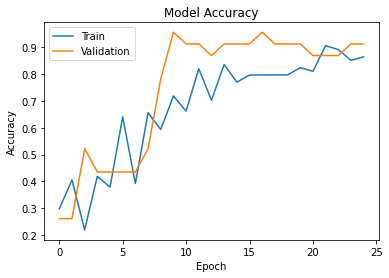

In [39]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

1/1 - 1s - loss: 0.1298 - accuracy: 1.0000 - 1s/epoch - 1s/step


* We have a significantly improved test accuracy in this model compared to the previous 2 models.

In [41]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

1/1 [==============================] - 0s 136ms/step


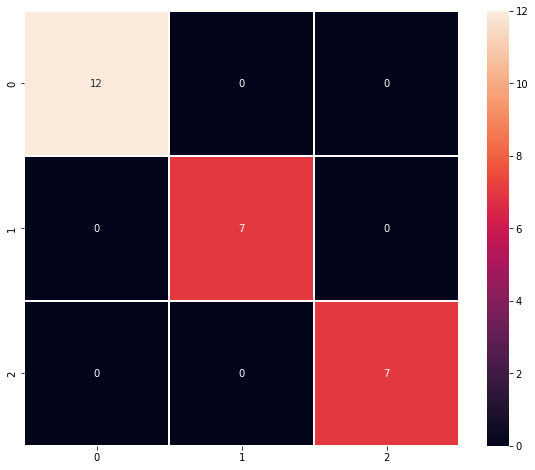

In [42]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

* According to the confusion matrix and accuracy curve, the VGG16 model has outperformed both other models.
* We only encountered one error in this matrix.

## **Visualizing the prediction:**

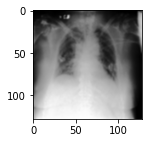

1/1 [==============================] - 1s 517ms/step
Predicted Label ['Covid']
True Label Covid


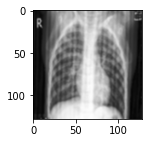

1/1 [==============================] - 0s 15ms/step
Predicted Label ['Viral Pneumonia']
True Label Viral Pneumonia


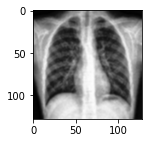

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Normal']
True Label Normal


In [43]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[10])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[10].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[10])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[20])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[20].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[20])                                              # using inverse_transform() to get the output label from the output vector

* We can see that our new model predicted these 3 images correctly.

# Conclusion
* Our final model was the best overall with an impressive 96% test accuracy.
* The first and third models were quite accurate at predicting the correct feature for the images tested.
* Transfer learning methods significantly improved our CNN model.

In [44]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['88%','89%','84%'],'Validation Accuracy':['87%','65%','91%'],'Test Accuracy':['92%','62%','96%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,88%,87%,92%
1,CNN Model with Data Augmentation,89%,65%,62%
2,Transfer Learning Model,84%,91%,96%


## Scope of Improvement
* These models can be improved further through experimentation with different filters.
* We could also try other transfer learning methods than VGG16 and possibly see improvements.
* We could also try other optimization methods and see if there is any improvement.